In [1]:
pip install tensorflow keras numpy pandas scikit-learn --break-system-packages

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install chardet --break-system-packages


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import chardet

# Open the file in binary mode to detect encoding
with open("Sarcasm_Headlines_Dataset_v2.json", "rb") as file:
    raw_data = file.read()

# Detect encoding
result = chardet.detect(raw_data)
encoding = result['encoding']

print(f"Detected encoding: {encoding}")


Detected encoding: ascii


In [4]:
import json

# Open the file in read mode
valid_data = []
with open("test_data.json", "r", encoding="utf-8") as file:
    for line in file:
        try:
            # Parse each line as a separate JSON object
            data = json.loads(line)
            valid_data.append(data)
            print(data)
        except json.JSONDecodeError as e:
            print(f"Error parsing line: {e}")


{'is_sarcastic': 0, 'headline': 'states slow to shut down weak teacher education programs', 'article_link': 'https://www.huffingtonpost.com/entry/teacher-education-school-closures_n_6401316.html'}
{'is_sarcastic': 1, 'headline': 'drone places fresh kill on steps of white house', 'article_link': 'https://www.theonion.com/drone-places-fresh-kill-on-steps-of-white-house-1819592535'}
{'is_sarcastic': 1, 'headline': 'report: majority of instances of people getting lives back on track occur immediately after visit to buffalo wild wings', 'article_link': 'https://www.theonion.com/report-majority-of-instances-of-people-getting-lives-b-1819573397'}
{'is_sarcastic': 1, 'headline': 'sole remaining lung filled with rich, satisfying flavor', 'article_link': 'https://local.theonion.com/sole-remaining-lung-filled-with-rich-satisfying-flavor-1819565360'}
{'is_sarcastic': 0, 'headline': "the gop's stockholm syndrome", 'article_link': 'https://www.huffingtonpost.com/entry/the-gops-stockholm-syndrome_us_

In [5]:
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



df = pd.DataFrame(valid_data)
# df = df.rename_column("is_sarcastic", "labels")
# df = df.rename_column("headline", "text")
df = df.rename(columns={'is_sarcastic': "label", "headline": "text"})

# Check that your JSON has 'text' and 'label' columns
print(df.head())

max_words = 10000    # Vocabulary size
maxlen = 25          # Maximum length for each sequence
embedding_dim = 100  # GloVe embedding dimensions

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

# Convert labels to NumPy array (assumes binary labels 0 and 1)
labels = np.array(df['label'])




/home/anjali/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-02-21 15:34:43.072524: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-21 15:34:43.155207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-21 15:34:43.187745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-21 15:34:43.202488: E external/local_xla/xla/stream_execut

   label                                               text  \
0      0  states slow to shut down weak teacher educatio...   
1      1    drone places fresh kill on steps of white house   
2      1  report: majority of instances of people gettin...   
3      1  sole remaining lung filled with rich, satisfyi...   
4      0                       the gop's stockholm syndrome   

                                        article_link  
0  https://www.huffingtonpost.com/entry/teacher-e...  
1  https://www.theonion.com/drone-places-fresh-ki...  
2  https://www.theonion.com/report-majority-of-in...  
3  https://local.theonion.com/sole-remaining-lung...  
4  https://www.huffingtonpost.com/entry/the-gops-...  


In [6]:
import json
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load training data
valid_train_data = []
with open("train_data.json", "r", encoding="utf-8") as file:
    for line in file:
        try:
            # Parse each line as a separate JSON object
            data = json.loads(line)
            valid_train_data.append(data)
            #print(data)
        except json.JSONDecodeError as e:
            print(f"Error parsing line: {e}")
train_df = pd.DataFrame(valid_train_data)
train_df = train_df.rename(columns={'is_sarcastic': "label", "headline": "text"})
print("TRain head:\n", train_df.head())


# Load testing data
valid_test_data = []
with open("test_data.json", "r", encoding="utf-8") as file:
    for line in file:
        try:
            # Parse each line as a separate JSON object
            data = json.loads(line)
            valid_test_data.append(data)
            # print(data)
        except json.JSONDecodeError as e:
            print(f"Error parsing line: {e}")
test_df = pd.DataFrame(valid_test_data)
test_df = test_df.rename(columns={'is_sarcastic': "label", "headline": "text"})
print("Test head:\n", test_df.head())

# Parameters
max_words = 10000    # Maximum vocabulary size
maxlen = 25          # Maximum sequence length (tokens)
embedding_dim = 100  # GloVe embedding dimensions

# Initialize and fit tokenizer on training data only (to avoid data leakage)
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

# Convert texts to sequences for training and testing data
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

# Pad sequences
X_train = pad_sequences(train_sequences, maxlen=maxlen, padding='post', truncating='post')
X_test = pad_sequences(test_sequences, maxlen=maxlen, padding='post', truncating='post')

# Extract labels (assuming binary labels 0 and 1)
y_train = np.array(train_df['label'])
y_test = np.array(test_df['label'])


TRain head:
    label                                               text  \
0      0  how trump really feels about queer people, exp...   
1      0  egyptian death sentence for soccer fans puts p...   
2      1  stripper failing school she's working self thr...   
3      0         texas attorney general ken paxton indicted   
4      0  congresswoman fights for gun control because s...   

                                        article_link  
0  https://www.huffingtonpost.com/entry/trump-rea...  
1  https://www.huffingtonpost.com/entry/egyptian-...  
2  https://www.theonion.com/stripper-failing-scho...  
3  https://www.huffingtonpost.com/entry/ken-paxto...  
4  https://www.huffingtonpost.com/entry/debbie-di...  
Test head:
    label                                               text  \
0      0  states slow to shut down weak teacher educatio...   
1      1    drone places fresh kill on steps of white house   
2      1  report: majority of instances of people gettin...   
3      1  sole

In [7]:
# Load GloVe embeddings into a dictionary
embeddings_index = {}
with open('glove.twitter.27B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coef = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coef

# Prepare the embedding matrix using the tokenizer's word_index
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    # Embedding layer with GloVe embeddings (non-trainable)
    Embedding(input_dim=max_words,
              output_dim=embedding_dim,
              input_length=maxlen,
              weights=[embedding_matrix],
              trainable=False),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dummy_input = np.zeros((1, maxlen))  # shape: (batch_size, maxlen)
_ = model(dummy_input)
model.summary()


/home/anjali/.local/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-02-21 15:36:15.301251: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (1, 25, 100)           │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (1, 25, 64)            │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1, 25, 64)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (1, 32)                │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1, 16)                │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 1)                 │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,055,201 (4.03 MB)

 Trainable params: 55,201 (215.63 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [9]:
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))


Epoch 1/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.6981 - loss: 0.5498 - val_accuracy: 0.8201 - val_loss: 0.3827
Epoch 2/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.8382 - loss: 0.3635 - val_accuracy: 0.8415 - val_loss: 0.3540
Epoch 3/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.8690 - loss: 0.3084 - val_accuracy: 0.8358 - val_loss: 0.3494
Epoch 4/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.8801 - loss: 0.2822 - val_accuracy: 0.8611 - val_loss: 0.3273
Epoch 5/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.8995 - loss: 0.2462 - val_accuracy: 0.8512 - val_loss: 0.3302
Epoch 6/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.9065 - loss: 0.2308 - val_accuracy: 0.8625 - val_loss: 0.3126
Epoch 7/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.9205 - loss: 0.2020 - val_accuracy: 0.8641 - val_loss: 0.3228
Epoch 8/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.9289 - loss: 0.1788 - 

In [10]:
#Saving epochwise training history as CSV file
import pandas as pd

# Convert history to a DataFrame
history_df = pd.DataFrame(history.history)

# Save to CSV
history_df.to_csv('LSTM_epoch_training_history.csv', index=False)

loaded_history_df = pd.read_csv('LSTM_epoch_training_history.csv')
print(loaded_history_df.head())


   accuracy      loss  val_accuracy  val_loss
0  0.769426  0.470566      0.820056  0.382726
1  0.842018  0.353747      0.841544  0.353951
2  0.869229  0.307410      0.835779  0.349373
3  0.882376  0.277267      0.861111  0.327339
4  0.896659  0.251604      0.851153  0.330232


In [11]:
# saving epochwise model training hsitory as JSON file

import json

# Save history to a JSON file
with open('LSTM_epoch_training_history.json', 'w') as f:
    json.dump(history.history, f)
with open('LSTM_epoch_training_history.json', 'r') as f:
    loaded_history = json.load(f)
print(loaded_history.keys())  # ['loss', 'accuracy', 'val_loss', 'val_accuracy']


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate on training data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_acc:.4f}")

# Predict on training data
y_train_pred_probs = model.predict(X_train)
y_train_pred = (y_train_pred_probs > 0.5).astype("int32").flatten()

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))


Training Accuracy: 0.9572
716/716 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step
Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     11990
           1       0.98      0.93      0.95     10905

    accuracy                           0.96     22895
   macro avg       0.96      0.96      0.96     22895
weighted avg       0.96      0.96      0.96     22895

Training Confusion Matrix:
[[11798   192]
 [  789 10116]]


In [13]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict on test data
y_test_pred_probs = model.predict(X_test)
y_test_pred = (y_test_pred_probs > 0.5).astype("int32").flatten()

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.8470
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      2995
           1       0.88      0.79      0.83      2729

    accuracy                           0.85      5724
   macro avg       0.85      0.84      0.85      5724
weighted avg       0.85      0.85      0.85      5724

Test Confusion Matrix:
[[2696  299]
 [ 577 2152]]


# Graph between Training Acc Vs Validation Acc AND TRaining Loss vs Validation Loss

TypeError: imsave() missing 1 required positional argument: 'arr'

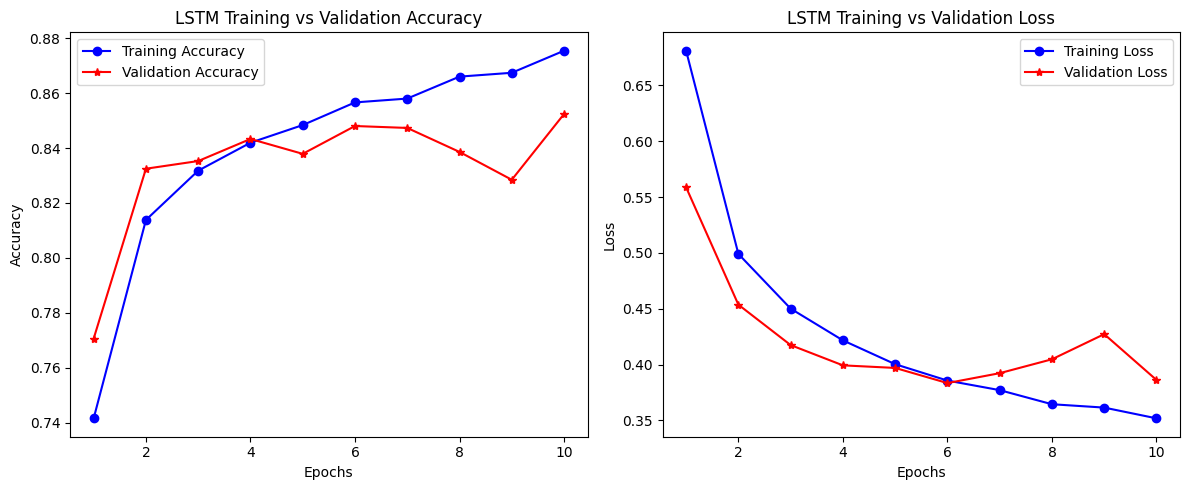

In [37]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plot Accuracy Graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r*-', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Training vs Validation Accuracy")
plt.legend()

# Plot Loss Graph
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label="Training Loss")
plt.plot(epochs, val_loss, 'r*-', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Training vs Validation Loss")
plt.legend()

plt.tight_layout()
plt.imsave("LSTM Training vs Validation.png")
plt.show()

# Confusion Matrix and Accuracy on Test Data

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Accuracy on short headlines: 0.8228


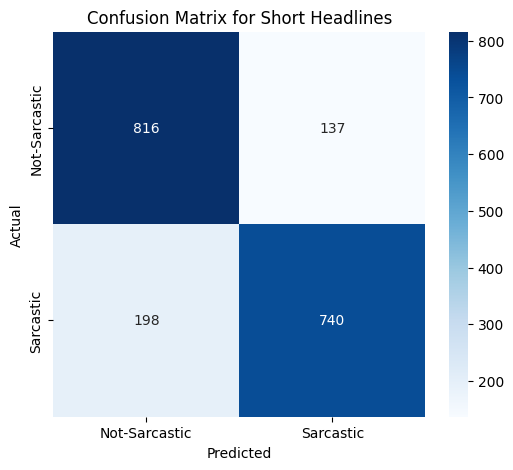

Accuracy on long headlines: 0.8591


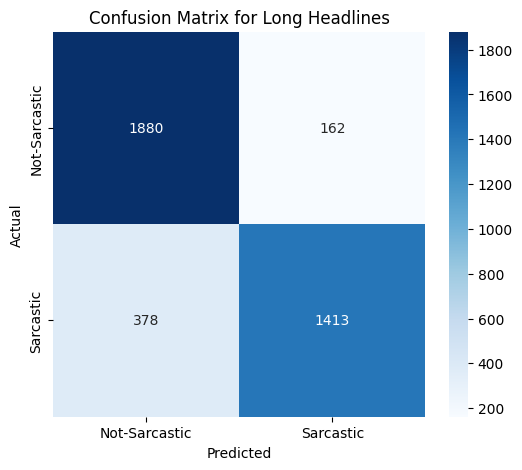

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the test data
test_df = pd.read_json("test_data.json", lines=True)


# Count words in the 'headline' column
test_df['word_count'] = test_df['headline'].apply(lambda x: len(x.split()))

# Split into short and long sets
short_test_df = test_df[test_df['word_count'] <= 8]
long_test_df = test_df[test_df['word_count'] > 8]

# Convert the text into sequences
short_sequences = tokenizer.texts_to_sequences(short_test_df['headline'])
long_sequences = tokenizer.texts_to_sequences(long_test_df['headline'])

# Pad sequences
short_padded = pad_sequences(short_sequences, maxlen=maxlen, padding='post')
long_padded = pad_sequences(long_sequences, maxlen=maxlen, padding='post')

# Get corresponding labels
y_short = np.array(short_test_df['is_sarcastic'])
y_long = np.array(long_test_df['is_sarcastic'])

# Make predictions
y_short_pred = (model.predict(short_padded) > 0.5).astype("int32")
y_long_pred = (model.predict(long_padded) > 0.5).astype("int32")

# Compute accuracies
short_accuracy = accuracy_score(y_short, y_short_pred)
long_accuracy = accuracy_score(y_long, y_long_pred)

# Compute confusion matrices
short_conf_matrix = confusion_matrix(y_short, y_short_pred)
long_conf_matrix = confusion_matrix(y_long, y_long_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not-Sarcastic', 'Sarcastic'], yticklabels=['Not-Sarcastic', 'Sarcastic'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot confusion matrices
print(f"Accuracy on short headlines: {short_accuracy:.4f}")
plot_confusion_matrix(short_conf_matrix, "Confusion Matrix for Short Headlines")

print(f"Accuracy on long headlines: {long_accuracy:.4f}")
plot_confusion_matrix(long_conf_matrix, "Confusion Matrix for Long Headlines")


### Now Training LSTM with L2 regularization

In [19]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Embedding(input_dim=max_words,
              output_dim=embedding_dim,
              input_length=maxlen,
              weights=[embedding_matrix],
              trainable=False),  # Using pre-trained GloVe embeddings (non-trainable)

    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),  # Dropout to prevent overfitting

    LSTM(32, kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),

    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),  # L2 on Dense layers
    Dropout(0.2),   
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dummy_input = np.zeros((1, maxlen))  # shape: (batch_size, maxlen)
_ = model(dummy_input)
model.summary()


/home/anjali/.local/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (1, 25, 100)           │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (1, 25, 64)            │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (1, 25, 64)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (1, 32)                │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (1, 32)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (1, 16)                │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (1, 16)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (1, 1)                 │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,055,201 (4.03 MB)

 Trainable params: 55,201 (215.63 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [20]:
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))


Epoch 1/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.6805 - loss: 0.6712 - val_accuracy: 0.8007 - val_loss: 0.4629
Epoch 2/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - accuracy: 0.8184 - loss: 0.4584 - val_accuracy: 0.8260 - val_loss: 0.4126
Epoch 3/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8332 - loss: 0.4204 - val_accuracy: 0.8354 - val_loss: 0.4047
Epoch 4/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.8521 - loss: 0.3898 - val_accuracy: 0.8379 - val_loss: 0.4020
Epoch 5/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8620 - loss: 0.3690 - val_accuracy: 0.8440 - val_loss: 0.3779
Epoch 6/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 44s 61ms/step - accuracy: 0.8674 - loss: 0.3601 - val_accuracy: 0.8377 - val_loss: 0.4086
Epoch 7/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - accuracy: 0.8695 - loss: 0.3573 - val_accuracy: 0.8443 - val_loss: 0.3779
Epoch 8/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 45s 62ms/step - accuracy: 0.8761 - loss: 0.3371 - 

In [21]:
#Saving epochwise training history as CSV file
import pandas as pd

# Convert history to a DataFrame
history_df = pd.DataFrame(history.history)

# Save to CSV
history_df.to_csv('LSTM_epoch_training_history_l2.csv', index=False)

loaded_history_df = pd.read_csv('LSTM_epoch_training_history_l2.csv')
print(loaded_history_df.head())


   accuracy      loss  val_accuracy  val_loss
0  0.751605  0.571363      0.800664  0.462901
1  0.821009  0.450487      0.825996  0.412642
2  0.839091  0.411433      0.835430  0.404674
3  0.852457  0.388045      0.837876  0.402047
4  0.858484  0.374388      0.843990  0.377928


In [22]:
# saving epochwise model training hsitory as JSON file

import json

# Save history to a JSON file
with open('LSTM_epoch_training_history_l2.json', 'w') as f:
    json.dump(history.history, f)
with open('LSTM_epoch_training_history_l2.json', 'r') as f:
    loaded_history = json.load(f)
print(loaded_history.keys())  # ['loss', 'accuracy', 'val_loss', 'val_accuracy']


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Graph between Training Acc Vs Validation Acc AND TRaining Loss vs Validation Loss with L2 Regularization

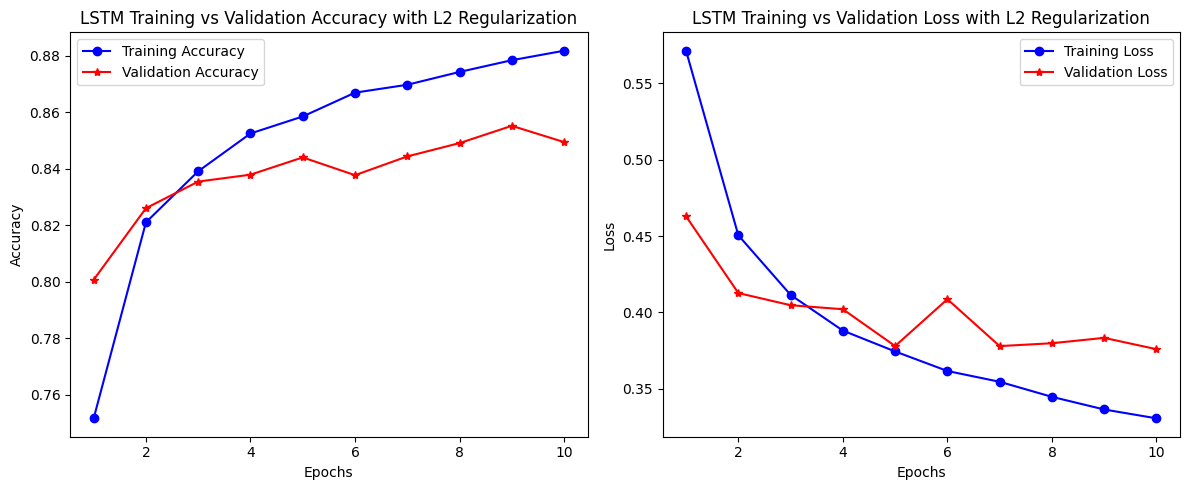

In [23]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plot Accuracy Graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r*-', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Training vs Validation Accuracy with L2 Regularization")
plt.legend()

# Plot Loss Graph
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label="Training Loss")
plt.plot(epochs, val_loss, 'r*-', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Training vs Validation Loss with L2 Regularization")
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate on training data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_acc:.4f}")

# Predict on training data
y_train_pred_probs = model.predict(X_train)
y_train_pred = (y_train_pred_probs > 0.5).astype("int32").flatten()

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))


Training Accuracy: 0.8933
716/716 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step
Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11990
           1       0.92      0.84      0.88     10905

    accuracy                           0.89     22895
   macro avg       0.90      0.89      0.89     22895
weighted avg       0.90      0.89      0.89     22895

Training Confusion Matrix:
[[11240   750]
 [ 1694  9211]]


In [25]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict on test data
y_test_pred_probs = model.predict(X_test)
y_test_pred = (y_test_pred_probs > 0.5).astype("int32").flatten()

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.8494
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2995
           1       0.88      0.79      0.83      2729

    accuracy                           0.85      5724
   macro avg       0.85      0.85      0.85      5724
weighted avg       0.85      0.85      0.85      5724

Test Confusion Matrix:
[[2701  294]
 [ 568 2161]]


# Confusion Matrix and Accuracy on Test Data

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Accuracy on short headlines: 0.8228


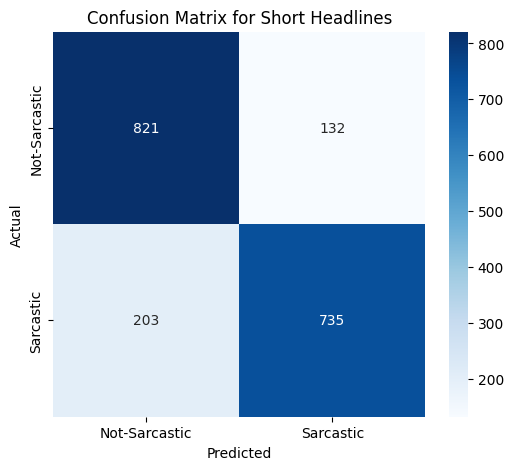

Accuracy on long headlines: 0.8628


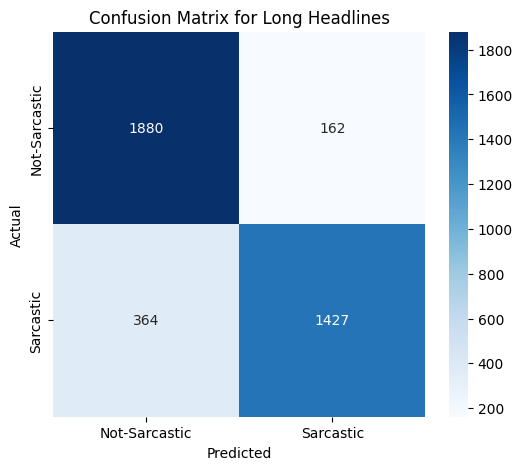

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the test data
test_df = pd.read_json("test_data.json", lines=True)


# Count words in the 'headline' column
test_df['word_count'] = test_df['headline'].apply(lambda x: len(x.split()))

# Split into short and long sets
short_test_df = test_df[test_df['word_count'] <= 8]
long_test_df = test_df[test_df['word_count'] > 8]

# Convert the text into sequences
short_sequences = tokenizer.texts_to_sequences(short_test_df['headline'])
long_sequences = tokenizer.texts_to_sequences(long_test_df['headline'])

# Pad sequences
short_padded = pad_sequences(short_sequences, maxlen=maxlen, padding='post')
long_padded = pad_sequences(long_sequences, maxlen=maxlen, padding='post')

# Get corresponding labels
y_short = np.array(short_test_df['is_sarcastic'])
y_long = np.array(long_test_df['is_sarcastic'])

# Make predictions
y_short_pred = (model.predict(short_padded) > 0.5).astype("int32")
y_long_pred = (model.predict(long_padded) > 0.5).astype("int32")

# Compute accuracies
short_accuracy = accuracy_score(y_short, y_short_pred)
long_accuracy = accuracy_score(y_long, y_long_pred)

# Compute confusion matrices
short_conf_matrix = confusion_matrix(y_short, y_short_pred)
long_conf_matrix = confusion_matrix(y_long, y_long_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not-Sarcastic', 'Sarcastic'], yticklabels=['Not-Sarcastic', 'Sarcastic'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot confusion matrices
print(f"Accuracy on short headlines: {short_accuracy:.4f}")
plot_confusion_matrix(short_conf_matrix, "Confusion Matrix for Short Headlines")

print(f"Accuracy on long headlines: {long_accuracy:.4f}")
plot_confusion_matrix(long_conf_matrix, "Confusion Matrix for Long Headlines")


## Training LSTM with Batch normalization

In [27]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Embedding(input_dim=max_words,
              output_dim=embedding_dim,
              input_length=maxlen,
              weights=[embedding_matrix],
              trainable=False),  # Using pre-trained GloVe embeddings (non-trainable)

    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),  # Dropout to prevent overfitting
    BatchNormalization(),
    LSTM(32, kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.5),
    BatchNormalization(),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),  # L2 on Dense layers
    Dropout(0.2),   
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
dummy_input = np.zeros((1, maxlen))  # shape: (batch_size, maxlen)
_ = model(dummy_input)
model.summary()


/home/anjali/.local/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (1, 25, 100)           │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (1, 25, 64)            │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (1, 25, 64)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (1, 25, 64)            │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (1, 32)                │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (1, 32)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (1, 32)                │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (1, 16)                │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (1, 16)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (1, 1)                 │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,055,585 (4.03 MB)

 Trainable params: 55,393 (216.38 KB)

 Non-trainable params: 1,000,192 (3.82 MB)

In [28]:
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_test, y_test))


Epoch 1/10


716/716 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.6740 - loss: 0.8037 - val_accuracy: 0.7706 - val_loss: 0.5588
Epoch 2/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.8146 - loss: 0.5073 - val_accuracy: 0.8325 - val_loss: 0.4537
Epoch 3/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8287 - loss: 0.4610 - val_accuracy: 0.8353 - val_loss: 0.4175
Epoch 4/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 33s 45ms/step - accuracy: 0.8389 - loss: 0.4276 - val_accuracy: 0.8433 - val_loss: 0.3993
Epoch 5/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.8468 - loss: 0.4029 - val_accuracy: 0.8379 - val_loss: 0.3970
Epoch 6/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8562 - loss: 0.3842 - val_accuracy: 0.8480 - val_loss: 0.3835
Epoch 7/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.8590 - loss: 0.3722 - val_accuracy: 0.8473 - val_loss: 0.3923
Epoch 8/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.8679 - loss: 0.3646 - val_accurac

In [29]:
#Saving epochwise training history as CSV file
import pandas as pd

# Convert history to a DataFrame
history_df = pd.DataFrame(history.history)

# Save to CSV
history_df.to_csv('LSTM_epoch_training_history_BN.csv', index=False)

loaded_history_df = pd.read_csv('LSTM_epoch_training_history_BN.csv')
print(loaded_history_df.head())


   accuracy      loss  val_accuracy  val_loss
0  0.741559  0.681121      0.770615  0.558784
1  0.813802  0.499141      0.832460  0.453701
2  0.831754  0.450159      0.835255  0.417505
3  0.841931  0.421730      0.843291  0.399349
4  0.848351  0.400385      0.837876  0.397038


In [30]:
# saving epochwise model training hsitory as JSON file

import json

# Save history to a JSON file
with open('LSTM_epoch_training_history_BN.json', 'w') as f:
    json.dump(history.history, f)
with open('LSTM_epoch_training_history_BN.json', 'r') as f:
    loaded_history = json.load(f)
print(loaded_history.keys())  # ['loss', 'accuracy', 'val_loss', 'val_accuracy']


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Training Accuracy: 0.8855
716/716 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step
Training Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     11990
           1       0.86      0.90      0.88     10905

    accuracy                           0.89     22895
   macro avg       0.89      0.89      0.89     22895
weighted avg       0.89      0.89      0.89     22895

Training Confusion Matrix:
[[10444  1546]
 [ 1075  9830]]


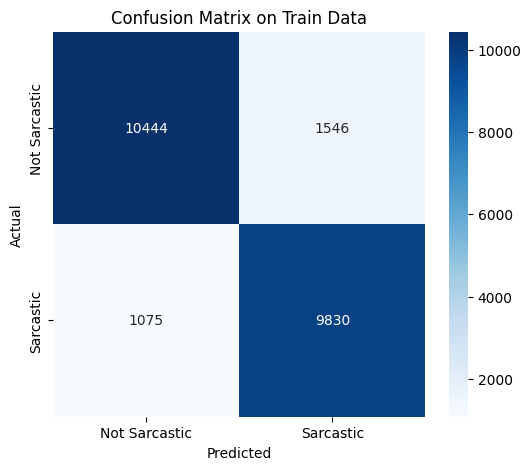

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 

# Evaluate on training data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_acc:.4f}")

# Predict on training data
y_train_pred_probs = model.predict(X_train)
y_train_pred = (y_train_pred_probs > 0.5).astype("int32").flatten()

print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix:")
print(cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Sarcastic", "Sarcastic"], yticklabels=["Not Sarcastic", "Sarcastic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Train Data")
plt.show()

Test Accuracy: 0.8524
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step
Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2995
           1       0.83      0.86      0.85      2729

    accuracy                           0.85      5724
   macro avg       0.85      0.85      0.85      5724
weighted avg       0.85      0.85      0.85      5724

Test Confusion Matrix:
[[2526  469]
 [ 376 2353]]


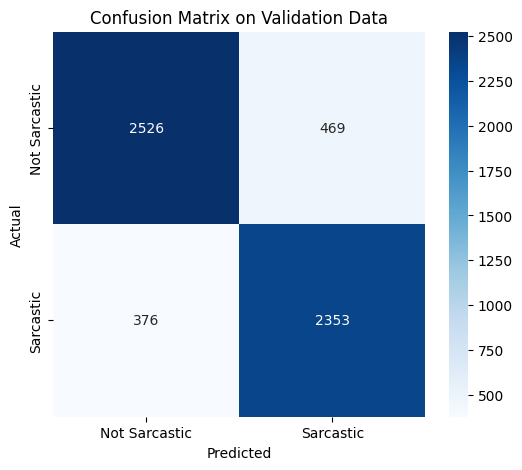

In [32]:
# Evaluate on test data
import matplotlib.pyplot as plt
import seaborn as sns 
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict on test data
y_test_pred_probs = model.predict(X_test)
y_test_pred = (y_test_pred_probs > 0.5).astype("int32").flatten()

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:")
print(cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Sarcastic", "Sarcastic"], yticklabels=["Not Sarcastic", "Sarcastic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Validation Data")
plt.show()

# Graph between Training Acc Vs Validation Acc AND TRaining Loss vs Validation Loss with Batch Normalization

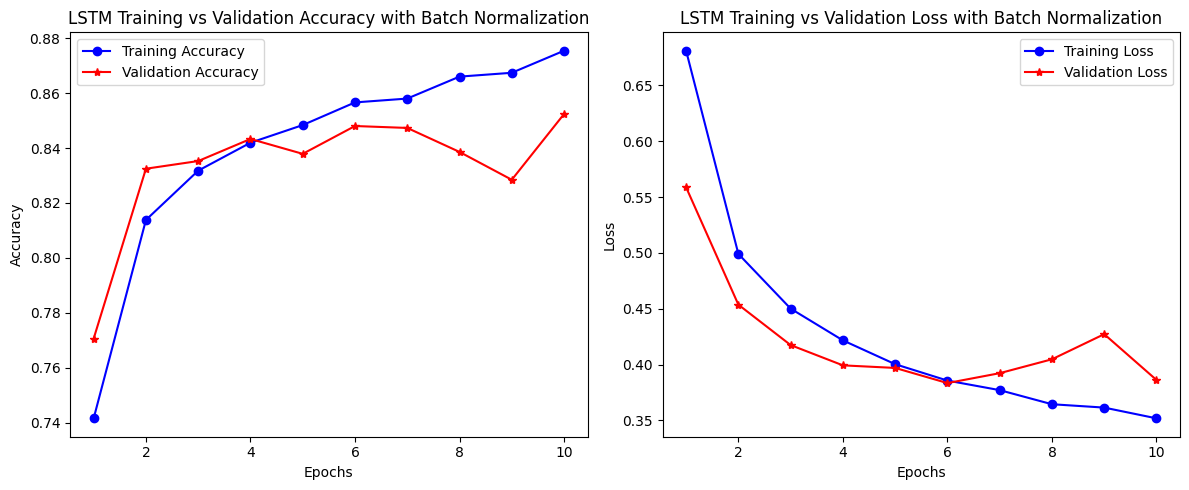

In [35]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_acc) + 1)

# Plot Accuracy Graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label="Training Accuracy")
plt.plot(epochs, val_acc, 'r*-', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Training vs Validation Accuracy with Batch Normalization")
plt.legend()

# Plot Loss Graph
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label="Training Loss")
plt.plot(epochs, val_loss, 'r*-', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Training vs Validation Loss with Batch Normalization")
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix and Accuracy on Test Data

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Accuracy on short headlines: 0.8324


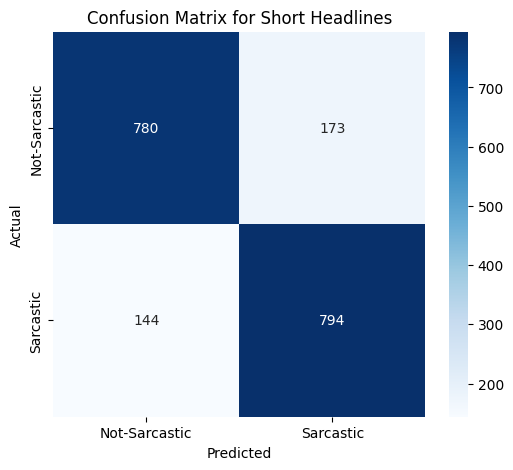

Accuracy on long headlines: 0.8622


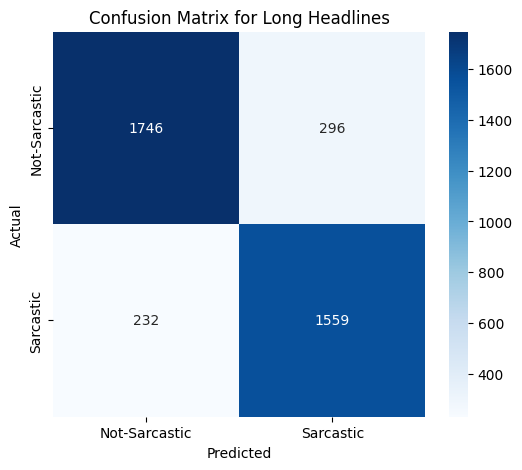

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the test data
test_df = pd.read_json("test_data.json", lines=True)


# Count words in the 'headline' column
test_df['word_count'] = test_df['headline'].apply(lambda x: len(x.split()))

# Split into short and long sets
short_test_df = test_df[test_df['word_count'] <= 8]
long_test_df = test_df[test_df['word_count'] > 8]

# Convert the text into sequences
short_sequences = tokenizer.texts_to_sequences(short_test_df['headline'])
long_sequences = tokenizer.texts_to_sequences(long_test_df['headline'])

# Pad sequences
short_padded = pad_sequences(short_sequences, maxlen=maxlen, padding='post')
long_padded = pad_sequences(long_sequences, maxlen=maxlen, padding='post')

# Get corresponding labels
y_short = np.array(short_test_df['is_sarcastic'])
y_long = np.array(long_test_df['is_sarcastic'])

# Make predictions
y_short_pred = (model.predict(short_padded) > 0.5).astype("int32")
y_long_pred = (model.predict(long_padded) > 0.5).astype("int32")

# Compute accuracies
short_accuracy = accuracy_score(y_short, y_short_pred)
long_accuracy = accuracy_score(y_long, y_long_pred)

# Compute confusion matrices
short_conf_matrix = confusion_matrix(y_short, y_short_pred)
long_conf_matrix = confusion_matrix(y_long, y_long_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not-Sarcastic', 'Sarcastic'], yticklabels=['Not-Sarcastic', 'Sarcastic'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# Plot confusion matrices
print(f"Accuracy on short headlines: {short_accuracy:.4f}")
plot_confusion_matrix(short_conf_matrix, "Confusion Matrix for Short Headlines")

print(f"Accuracy on long headlines: {long_accuracy:.4f}")
plot_confusion_matrix(long_conf_matrix, "Confusion Matrix for Long Headlines")
